In [1]:
# Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [3]:
# Load dataset
wine = pd.read_csv("C:\\Users\\sweta\\Downloads\\Bharat_Intern_Task_2\\winequality-red.csv")

In [4]:
# Display initial data
print(wine.head())
print(wine.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

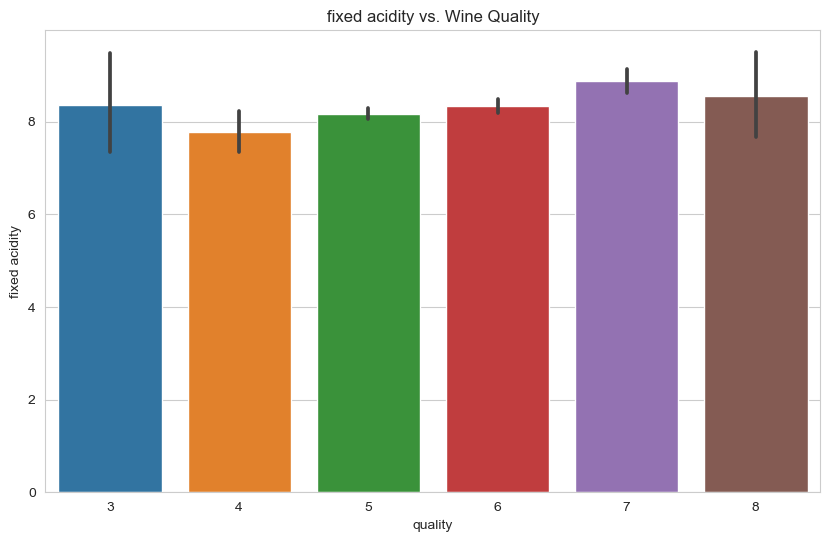

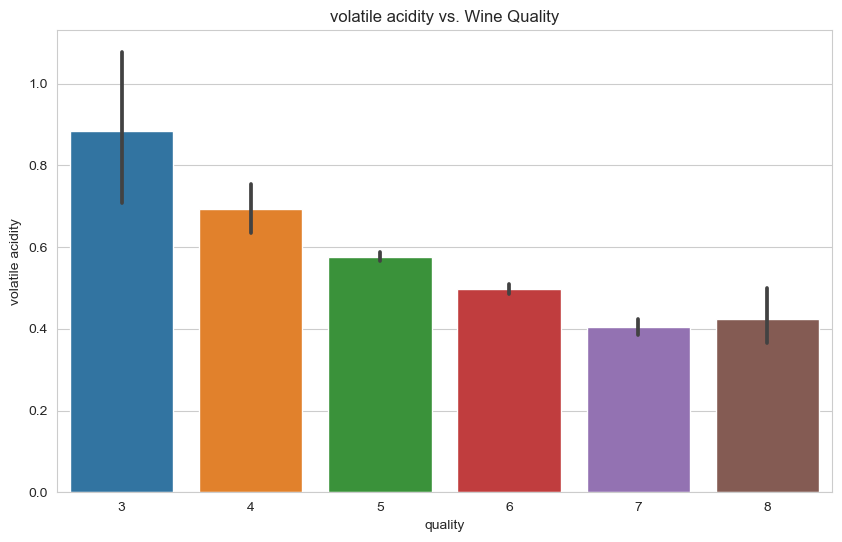

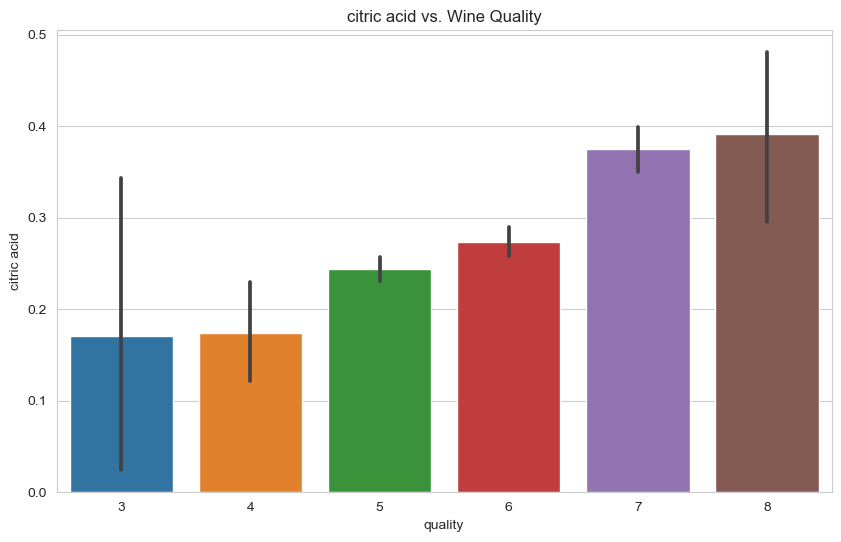

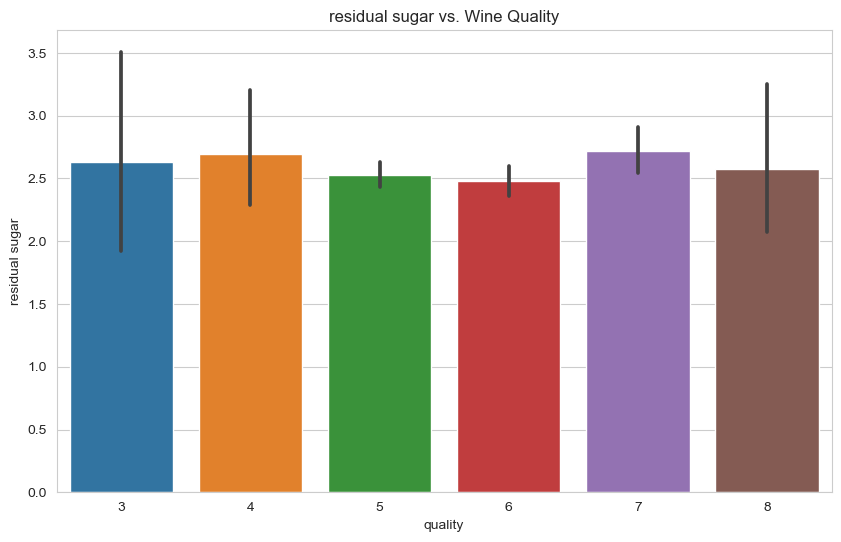

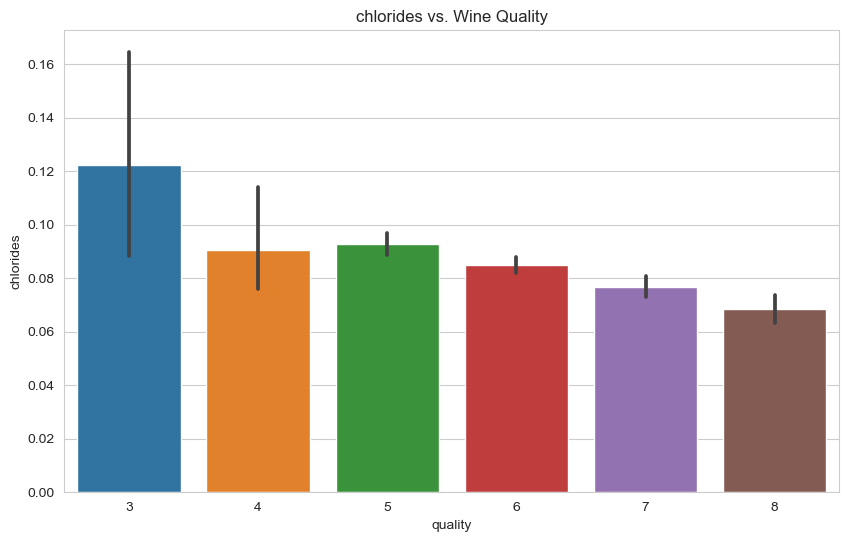

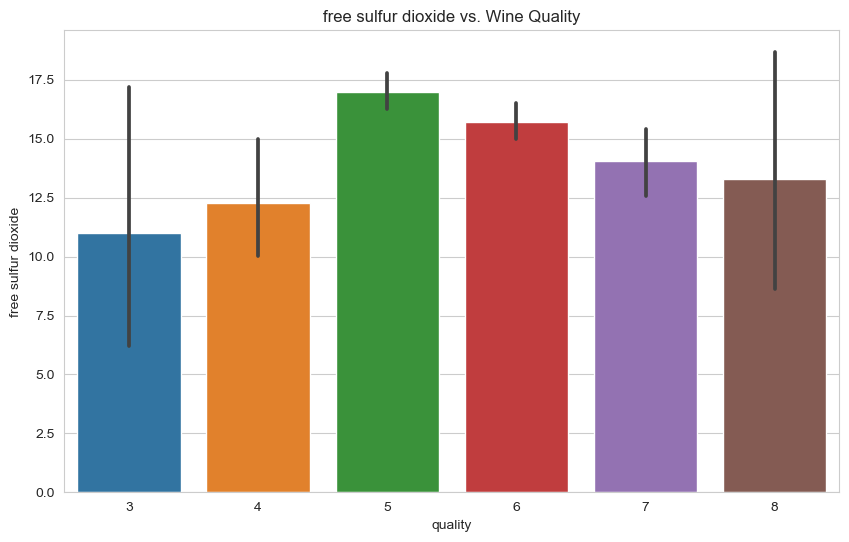

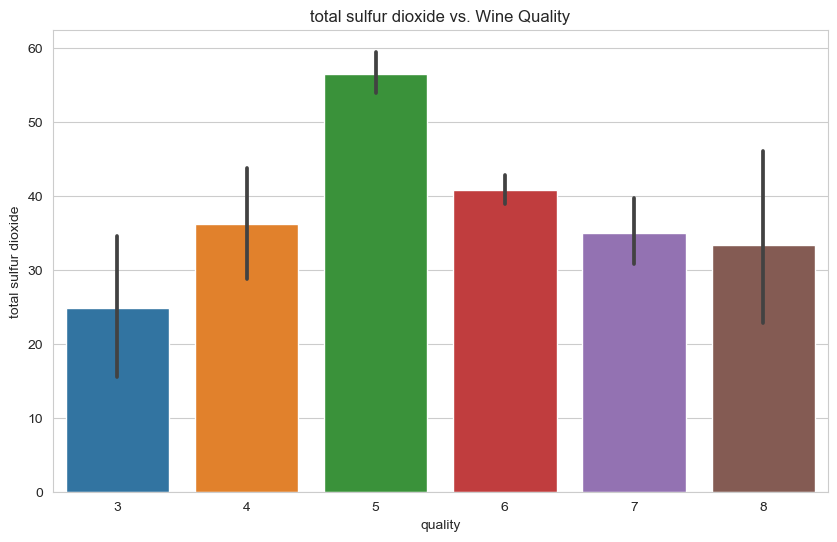

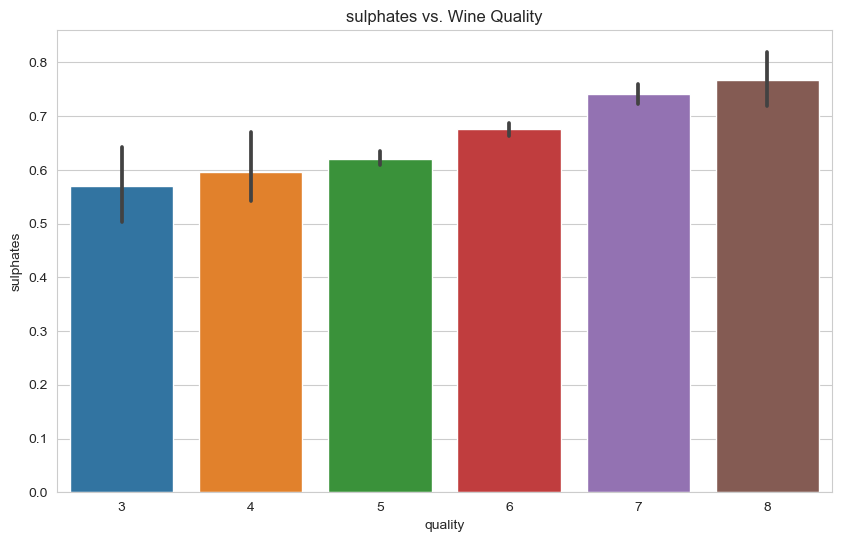

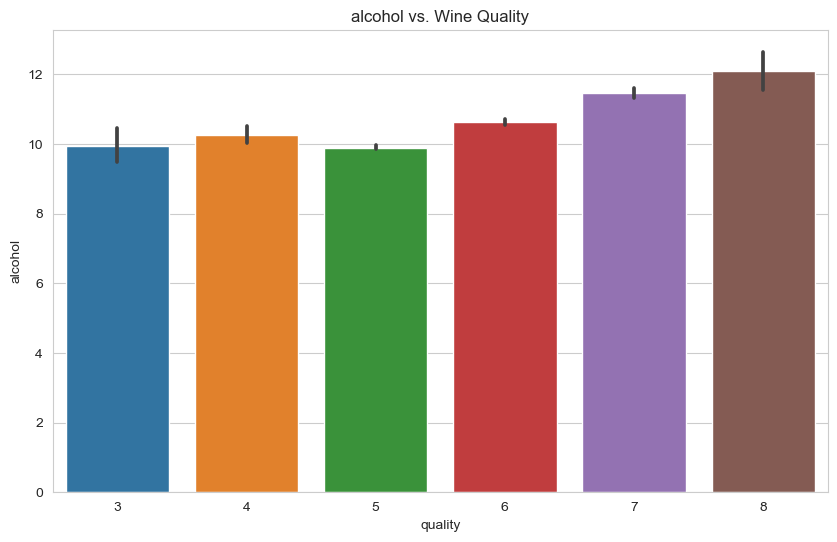

In [5]:
# Plot various features against wine quality
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='quality', y=feature, data=wine)
    plt.title(f'{feature} vs. Wine Quality')
    plt.show()

In [6]:
# Split data into train and test sets
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # Use transform instead of fit_transform for test set

In [8]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [9]:
# Evaluate the Linear Regression Model
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)

print(f"Mean Squared Error for Linear Regression: {mse}")
print(f"R2 Score for Linear Regression: {r2}")

Mean Squared Error for Linear Regression: 0.39002514396395493
R2 Score for Linear Regression: 0.4031803412796219


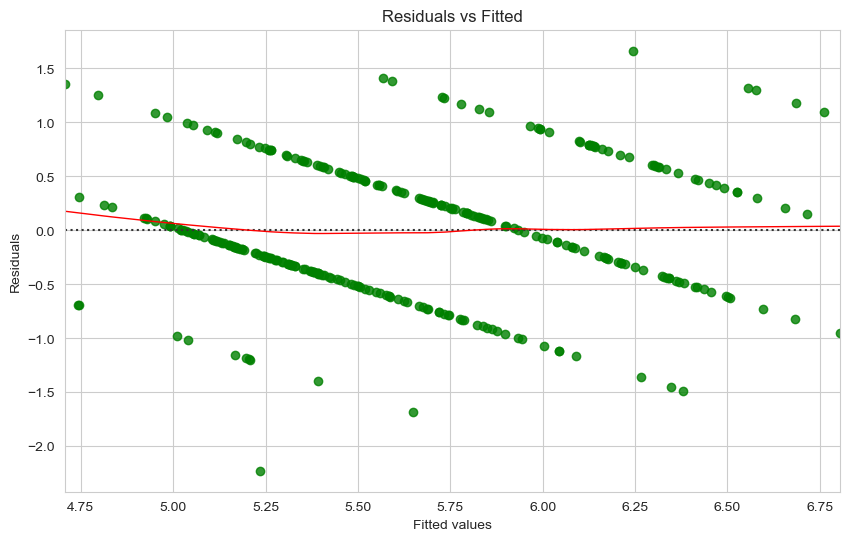

In [10]:
# Continue with visualizations

# Residuals Plot
plt.figure(figsize=(10, 6))
residuals = y_test - pred_lr
sns.residplot(x=pred_lr, y=residuals, lowess=True, color="g", line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

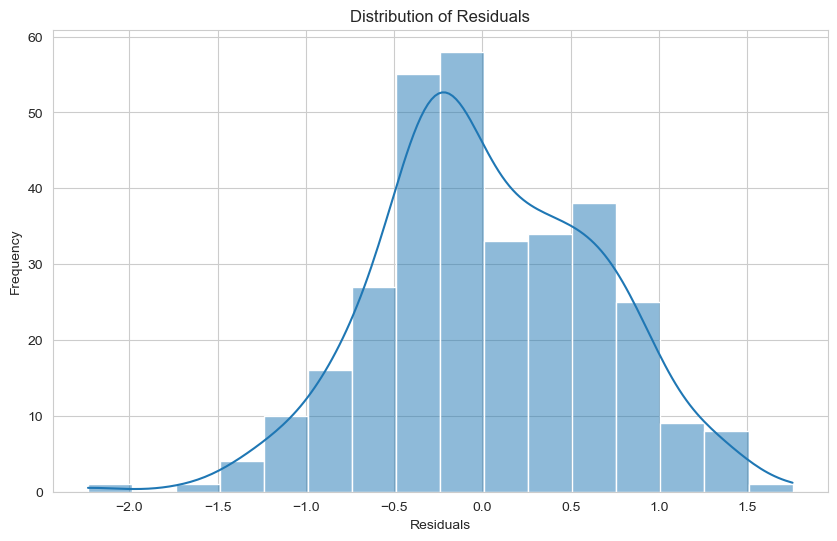

In [11]:
# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

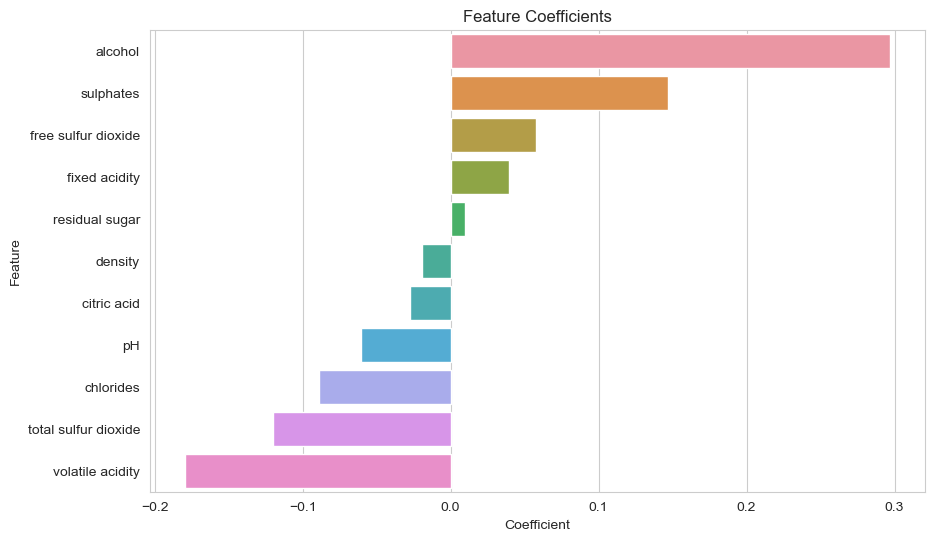

In [12]:
# Coefficient Analysis
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title('Feature Coefficients')
plt.show()

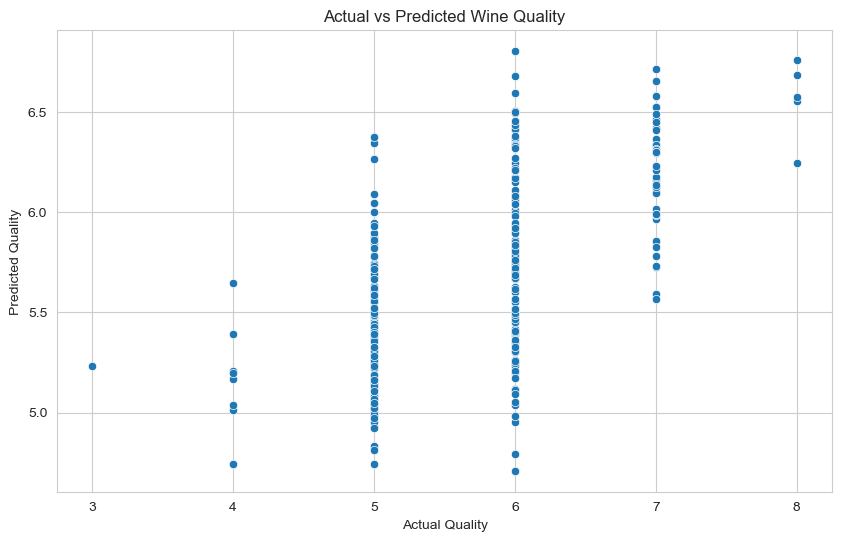

In [13]:
# Predictions vs Actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred_lr)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.show()

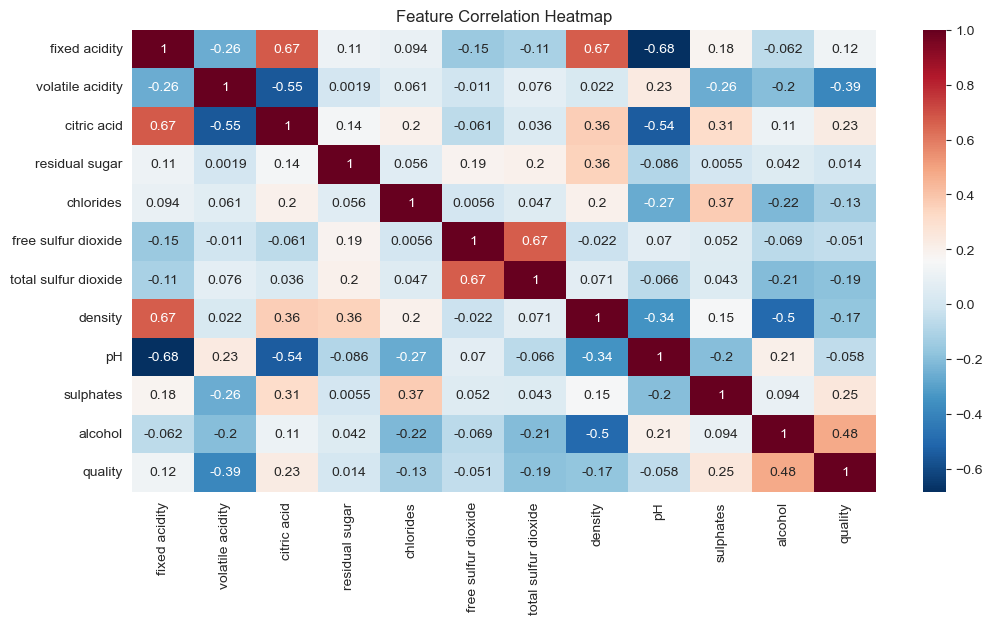

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(wine.corr(), annot=True, cmap='RdBu_r')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
import plotly.express as px

fig = px.scatter_3d(wine, x='fixed acidity', y='volatile acidity', z='citric acid',
                    color='quality', color_continuous_scale='Viridis')
fig.show()